# Loading Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.irf import IRAnalysis
from statsmodels.tsa.vector_ar.output import VARSummary
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.tsa.tsatools as tsa
import scipy.stats as stats
from statsmodels.tsa.tsatools import duplication_matrix, unvec, vec
from statsmodels.tsa.vector_ar import output, plotting, util
from statsmodels.tsa.vector_ar.hypothesis_test_results import CausalityTestResults
from statsmodels.tsa.vector_ar.hypothesis_test_results import NormalityTestResults
from statsmodels.tsa.vector_ar.hypothesis_test_results import WhitenessTestResults
from statsmodels.tsa.base.tsa_model import TimeSeriesResultsWrapper
from statsmodels.tsa.base.tsa_model import TimeSeriesModel

# Loading our Dataset

In [2]:
#Loading Data and defining the time span 
#data_model = pd.read_excel('Master_Data.xlsx', parse_dates= True, index_col=0)
data_model= pd.read_excel('Master_Data.xlsx',parse_dates=['date'], index_col='date')
data_model.dropna(inplace=True)

## Descriptive Analysis

In [3]:
data_model.describe() # for showing Stat descri

,x1,x2,x3
count,78.000000,7.800000e+01,78.000000
mean,58868.075128,4.575883e+05,0.000007
std,161400.424497,9.467637e+05,0.001469
min,-398284.840000,-2.055721e+06,-0.004963
25%,1623.882500,6.932307e+04,-0.000535
50%,54385.125000,4.266523e+05,0.000000
75%,118926.985000,7.775143e+05,0.000627
max,746927.810000,4.705251e+06,0.006042


In [4]:
import qgrid
widget=qgrid.show_grid(data_model,show_toolbar=True)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Ploting Variables

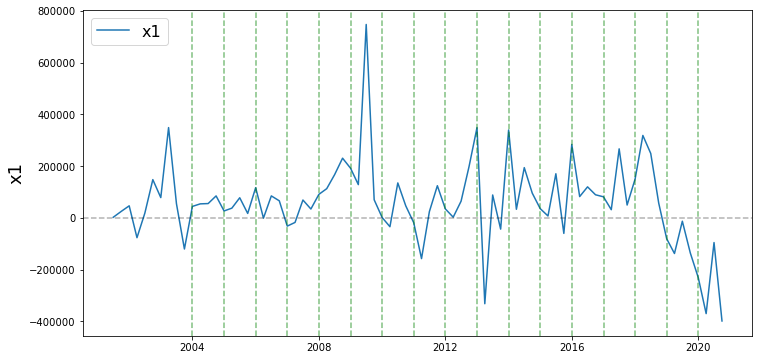

In [5]:
plt.figure(figsize=(12,6))
CandI_Bal, = plt.plot(data_model['x1'])
for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('x1', fontsize=18)
plt.legend(['x1'], fontsize=16)

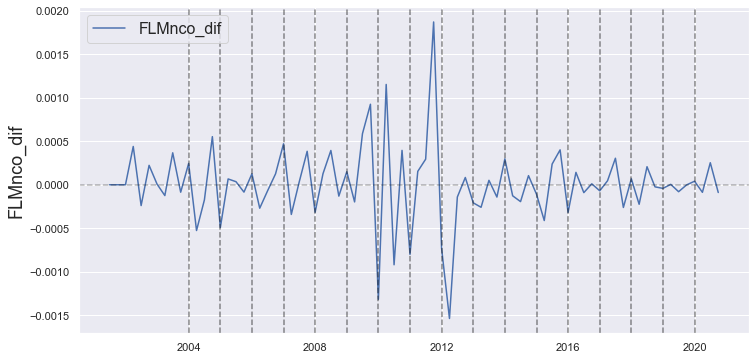

In [369]:
plt.figure(figsize=(12,6))
CandI_Bal, = plt.plot(data_model['FLMnco_dif'])
for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('FLMnco_dif', fontsize=18)
plt.legend(['FLMnco_dif'], fontsize=16)

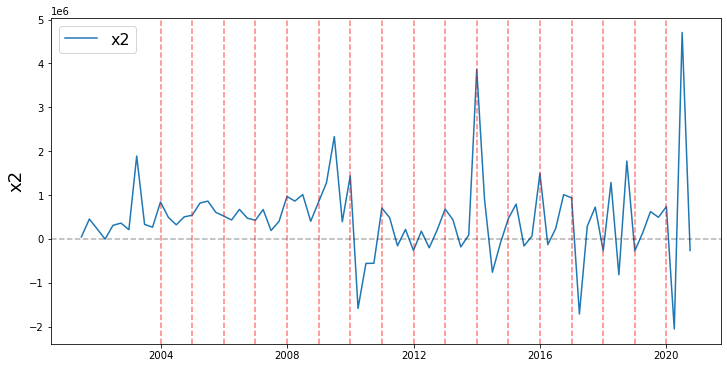

In [6]:
plt.figure(figsize=(12,6))
CandI_Bal, = plt.plot(data_model['x2'])
for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='red', alpha=0.5)    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('x2', fontsize=18)
plt.legend(['x2'], fontsize=16)

#  Ploting all variables in the same Graph

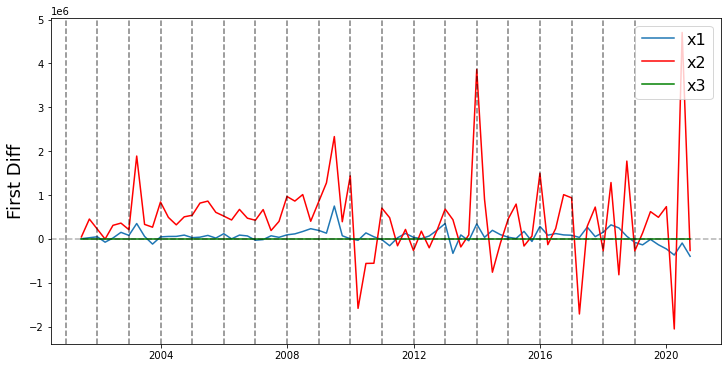

In [7]:
plt.figure(figsize=(12,6))
FLMBal_dif, = plt.plot(data_model['x1'])
RetailFunding_dif, = plt.plot(data_model['x2'], color='red')
FLMnco_dif, = plt.plot(data_model['x3'], color='green')
for year in range(2001, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Diff', fontsize=18)

plt.legend(['x1', 'x2','x3'], fontsize=16)

# Stationarity Test using ADF test with Output

In [8]:
for i in range(len(data_model.columns)):
 result= adfuller(data_model[data_model.columns[i]])

 if result[1] > 0.05:
    print('{} -Series is not Stationary'.format(data_model.columns[i]))
 else:
    print('{} -Series is Stationary'.format(data_model.columns[i]))

x1 -Series is Stationary
x2 -Series is Stationary
x3 -Series is Stationary


# Choosing Lag of VAR model

In [9]:
model =VAR(data_model)
for i in range(0, 10):
    results = model.fit(i+1)
    print('Order=', i+1)
    print('AIC: ',results.aic)
    print('BIC: ',results.bic)

C:\Users\LOKMAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


Order= 1
AIC:  38.314719847653215
BIC:  38.679988225084955
Order= 2
AIC:  38.35583921634138
BIC:  38.99985763931523
Order= 3
AIC:  38.415728911084855
BIC:  39.34272415649938
Order= 4
AIC:  38.54244473934771
BIC:  39.75674931549585
Order= 5
AIC:  38.64051154053821
BIC:  40.1465670634851
Order= 6
AIC:  38.78090155463994
BIC:  40.583262232194315
Order= 7
AIC:  38.63383446204245
BIC:  40.737170685771
Order= 8
AIC:  38.727742241047075
BIC:  41.13684428609996
Order= 9
AIC:  38.60071751628456
BIC:  41.32049934796818
Order= 10
AIC:  38.49136598002667
BIC:  41.52686916504694


In [10]:
adfuller(data_model['x1'])

(-3.6863501104202445,
 0.00430930052294621,
 1,
 76,
 {'1%': -3.5194805351545413,
  '5%': -2.9003945086747343,
  '10%': -2.5874984279778395},
 1746.3611425403678)

In [11]:
adfuller(data_model['x2'])

(-3.0265525324396823,
 0.0324880371016224,
 12,
 65,
 {'1%': -3.5352168748293127,
  '5%': -2.9071540828402367,
  '10%': -2.5911025443786984},
 1978.2108573229725)

In [12]:
adfuller(data_model['x3'])

(-7.643119450765377,
 1.8729765814303675e-11,
 2,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 -661.8951218811675)

# Partial AutoCorrelation Function

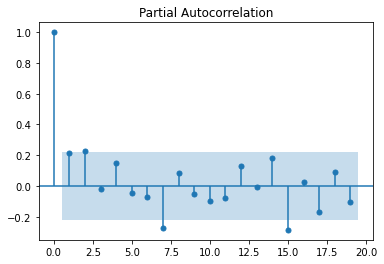

In [13]:
plot_pacf(data_model['x1'])
plt.show()

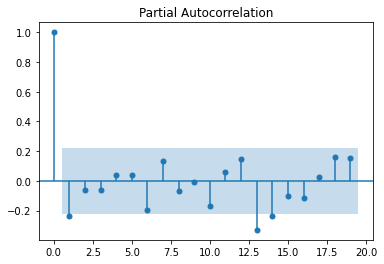

In [14]:
plot_pacf(data_model['x2'])
plt.show()

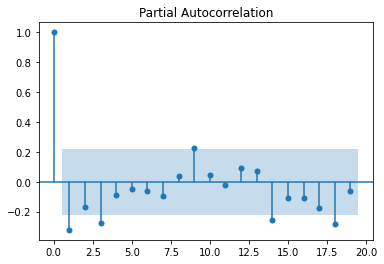

In [15]:
plot_pacf(data_model['x3'])
plt.show()

# Fit a VAR Model 

In [16]:
var= data_model[['x1', 'x2','x3']]

In [17]:
model = VAR(var)

C:\Users\LOKMAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


# Verifying the Lag of VAR model using the AIC criterion

In [18]:
forecasting_model = VAR(var)
                        
results_aic = []
for p in range(0,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\Users\LOKMAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


# Ploting the AIC criterion to visualize the min AIC

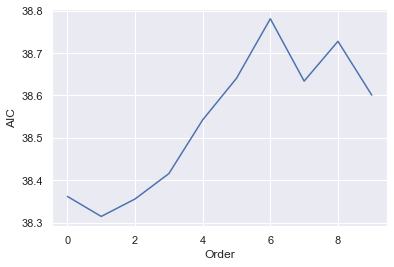

In [19]:
import seaborn as sns
sns.set()
plt.plot(list(np.arange(0,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [384]:
# Accurding to the AIC criterion the LAG=1 of the VAR model

In [20]:
model_fit = model.fit(1)

In [21]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Apr, 2021
Time:                     14:32:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    38.6800
Nobs:                     77.0000    HQIC:                   38.4608
Log likelihood:          -1790.89    FPE:                4.36509e+16
AIC:                      38.3147    Det(Omega_mle):     3.74982e+16
--------------------------------------------------------------------
Results for equation x1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const     59659.142042     20426.756956            2.921           0.003
L1.x1         0.333321         0.123795            2.693           0.007
L1.x2        -0.046235         0.019902           -2.323           0.020
L1.x3  -6368475.205729

# VAR model for maxLag=13

In [22]:
model_fit2 = model.fit(maxlags=13)

In [388]:
model_fit2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Apr, 2021
Time:                     23:58:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    34.8507
Nobs:                     65.0000    HQIC:                   32.4203
Log likelihood:          -1158.88    FPE:                4.55300e+13
AIC:                      30.8364    Det(Omega_mle):     1.08011e+13
--------------------------------------------------------------------
Results for equation FLMBal_dif
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                      36075.903544     37612.739992            0.959           0.337
L1.FLMBal_dif                  0.292057         0.233060            1.253           0.210
L1.RetailFunding_di

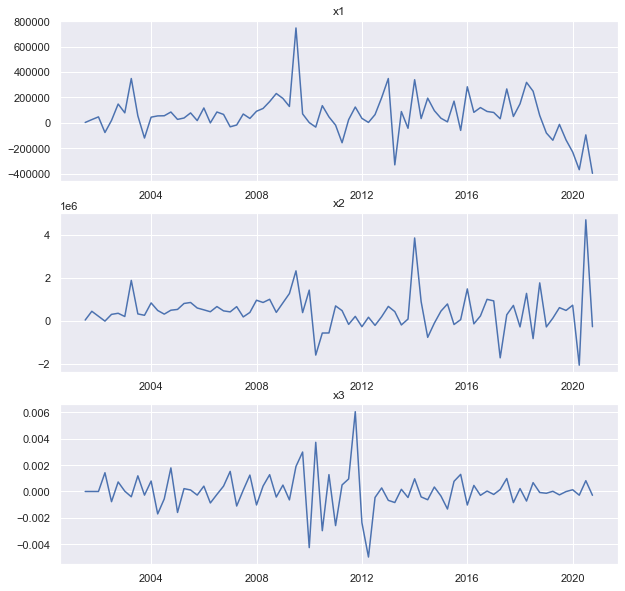

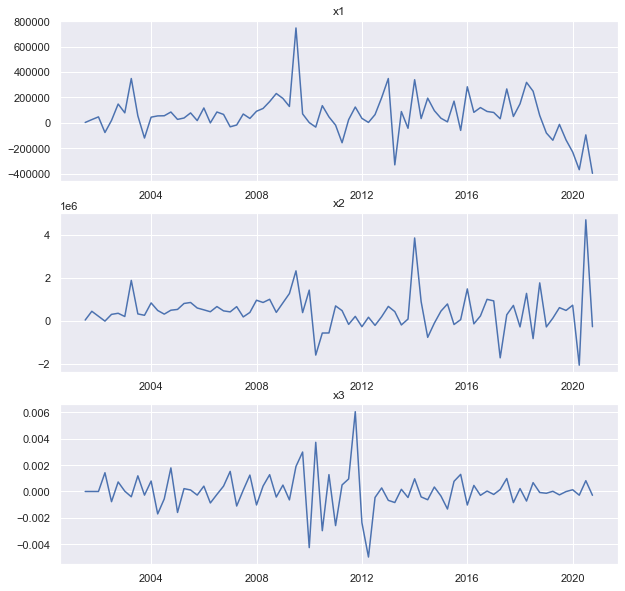

In [23]:
model_fit.plot()

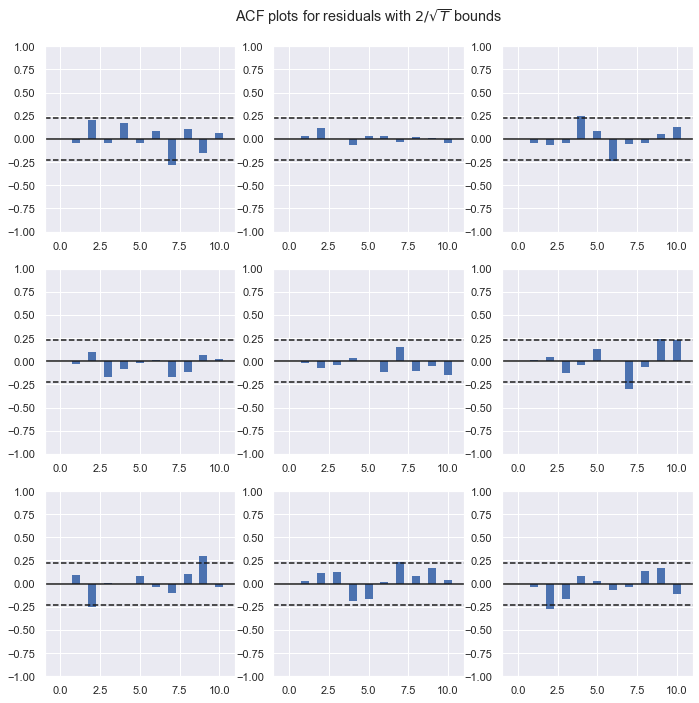

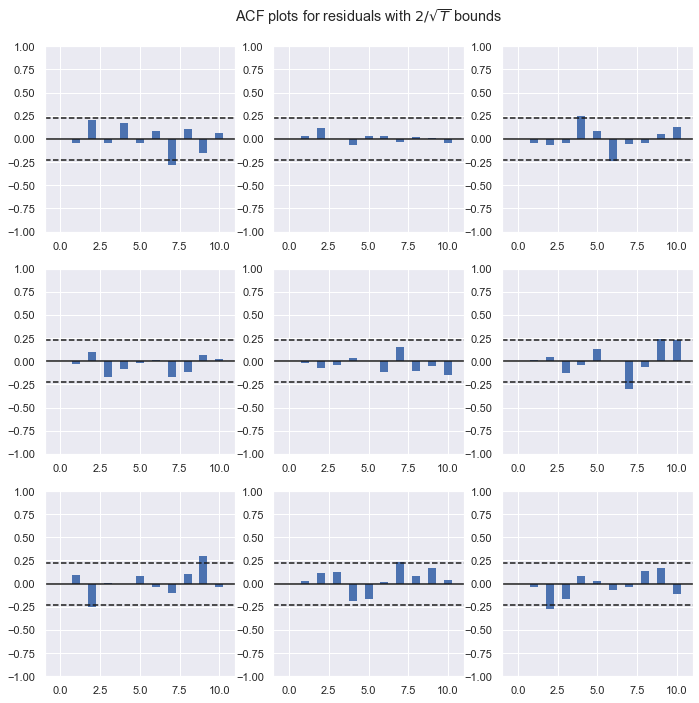

In [24]:
model_fit.plot_acorr()

# Forecasting

In [25]:
lag_order = model_fit.k_ar

In [26]:
model_fit.forecast(data_model.values[-lag_order:], 10)

array([[-5.89815317e+04,  6.45001472e+05, -4.90216402e-04],
       [ 1.32994773e+04,  3.97117295e+05,  5.94960126e-05],
       [ 4.53524404e+04,  4.86566150e+05, -7.40946197e-05],
       [ 5.27514635e+04,  4.54078591e+05,  1.58902718e-05],
       [ 5.61467197e+04,  4.67279434e+05, -9.76932656e-06],
       [ 5.68315002e+04,  4.62166181e+05,  4.01704814e-06],
       [ 5.72083665e+04,  4.64257087e+05, -4.18318189e-07],
       [ 5.72655572e+04,  4.63433845e+05,  1.71277928e-06],
       [ 5.73091110e+04,  4.63768540e+05,  9.70221196e-07],
       [ 5.73128826e+04,  4.63635814e+05,  1.30386688e-06]])

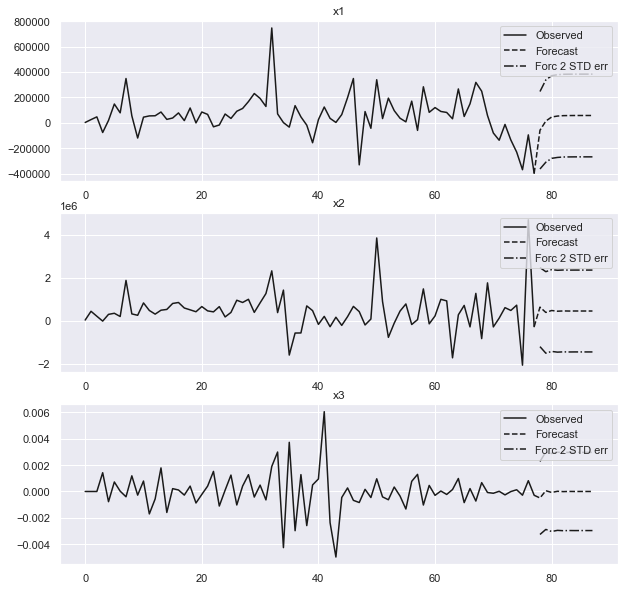

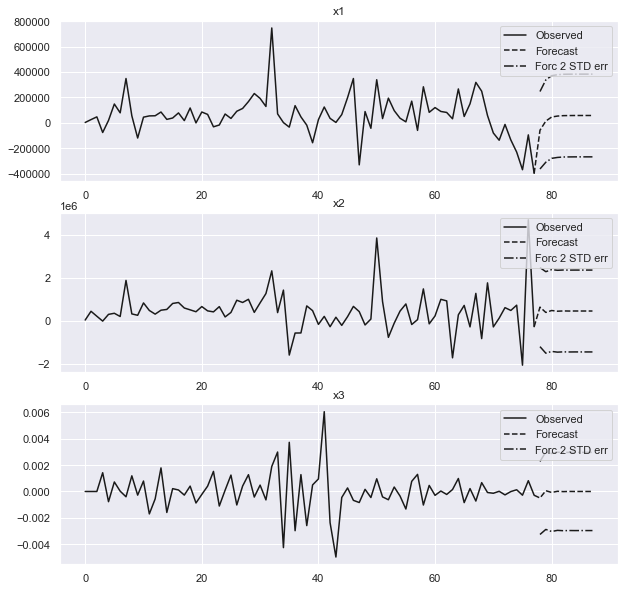

In [27]:
model_fit.plot_forecast(10)

# Impulse Response Analysis

In [28]:
irf = model_fit.irf(10)

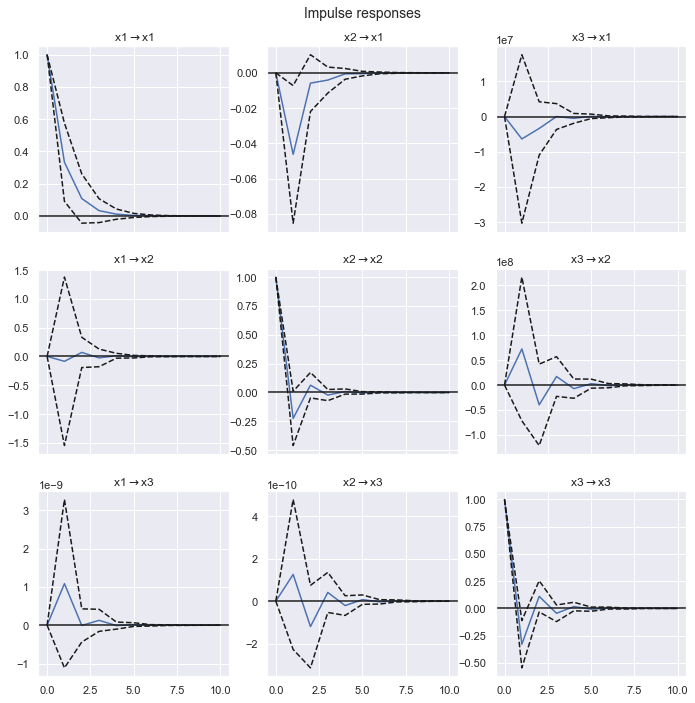

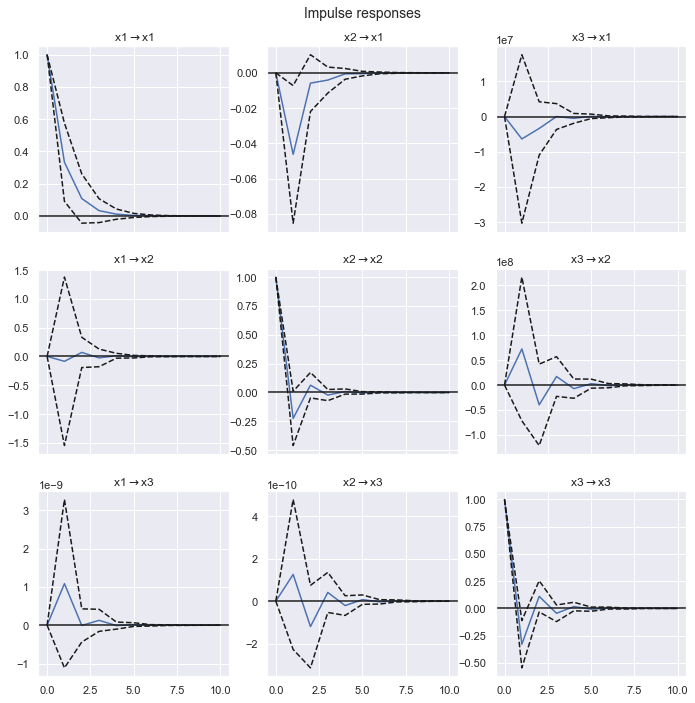

In [29]:
irf.plot(orth=False)

# Plot each variables apart

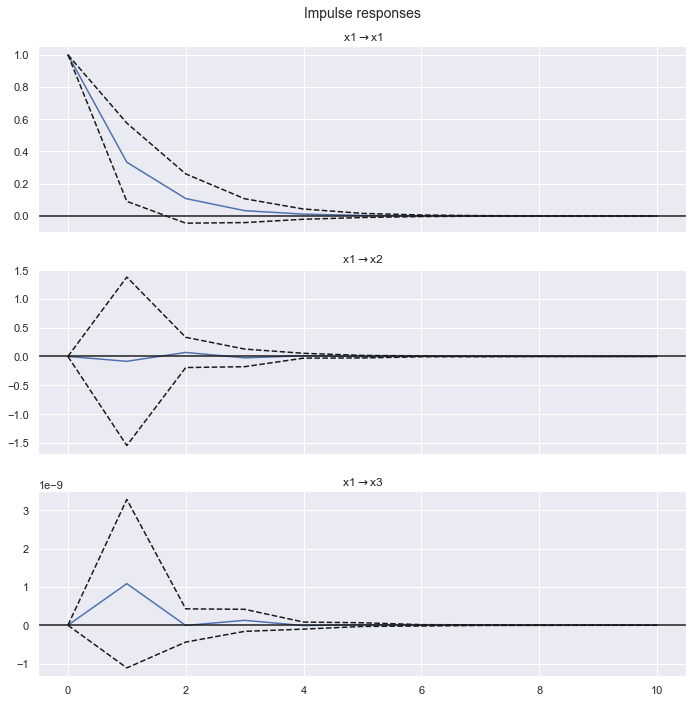

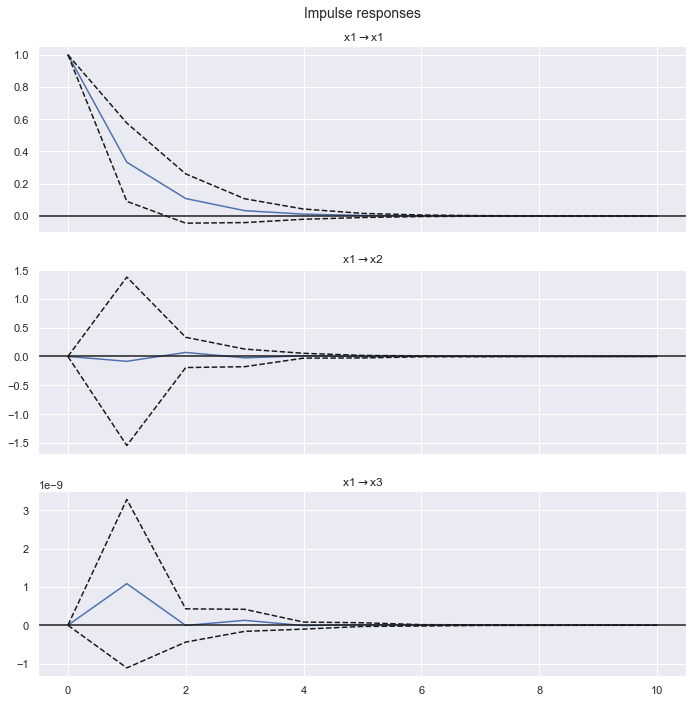

In [31]:
irf.plot(impulse='x1')

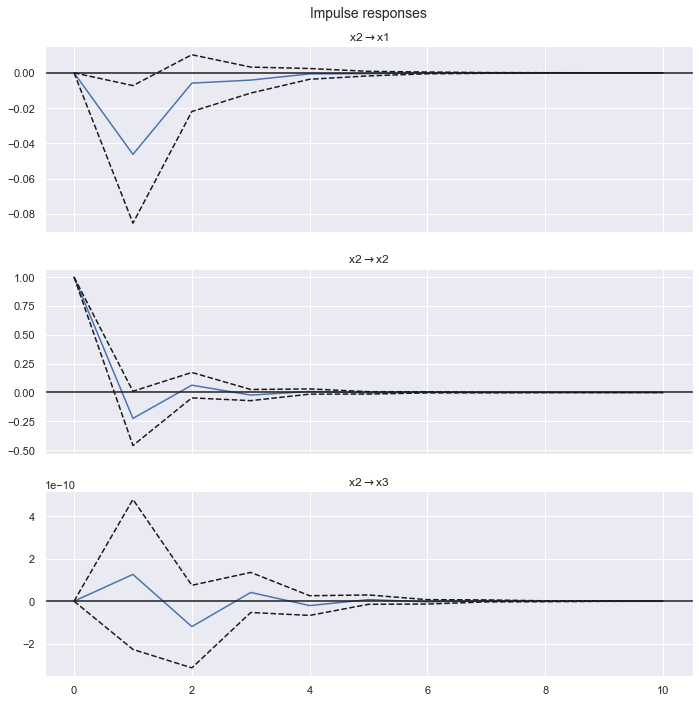

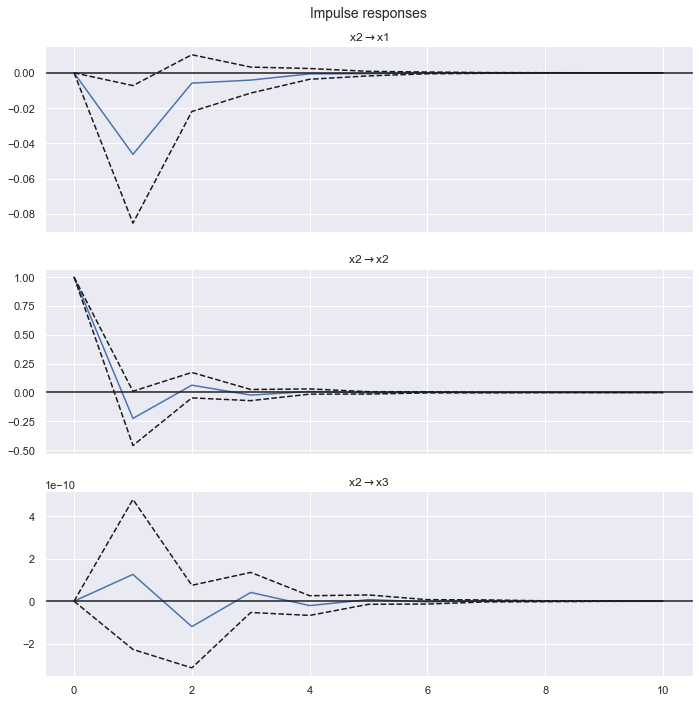

In [32]:
irf.plot(impulse='x2')

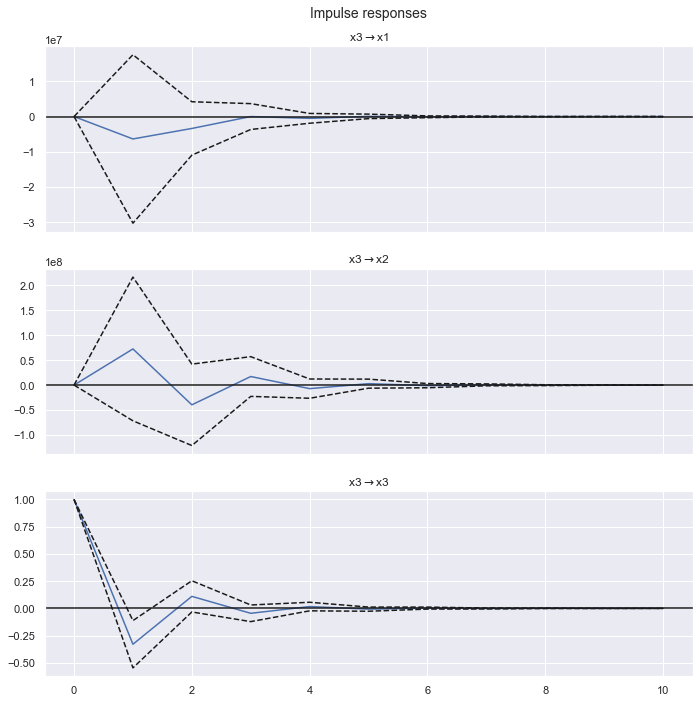

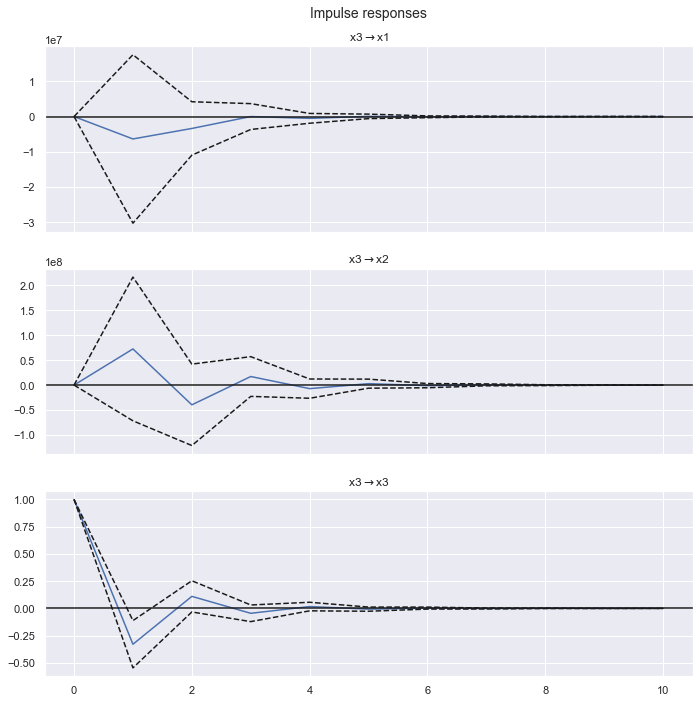

In [33]:
irf.plot(impulse='x3')

# The cumulative effects can be plotted with the long run effects as follows

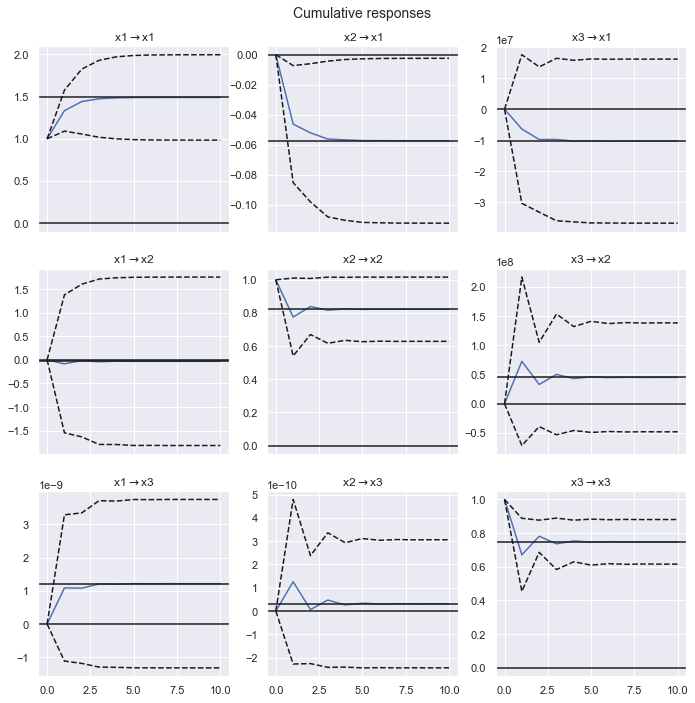

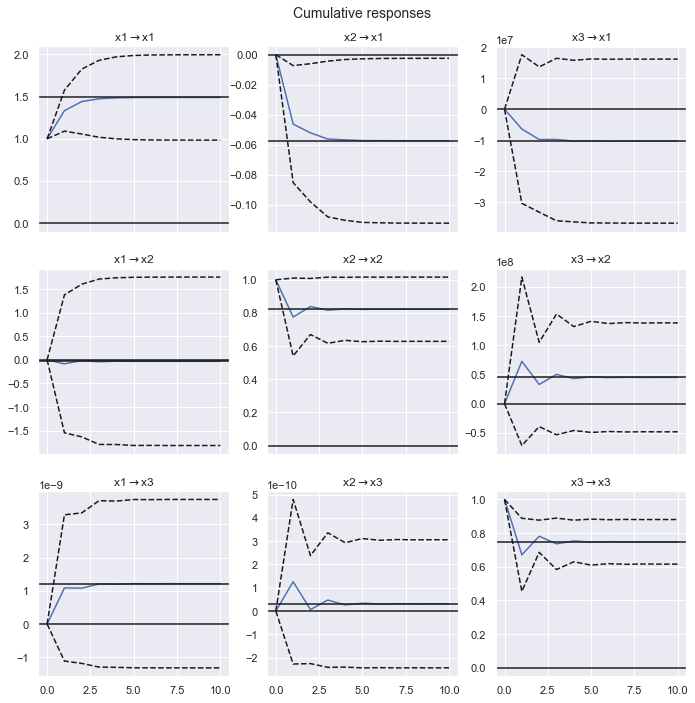

In [34]:
irf.plot_cum_effects(orth=False)

In [35]:
model_fit.is_stable(verbose=True)

Eigenvalues of VAR(1) rep
0.31934338554944114
0.4010342154178455
0.13838862842590507


True

In [36]:
model_fit.intercept_longrun()

array([5.73189145e+04, 4.63674302e+05, 1.22036258e-06])

# Forecast Error Variance Decomposition (FEVD)

In [37]:
fevd = model_fit.fevd(5)

In [38]:
fevd.summary()

FEVD for x1
           x1        x2        x3
0    1.000000  0.000000  0.000000
1    0.935724  0.061375  0.002902
2    0.934563  0.061751  0.003687
3    0.934146  0.062171  0.003683
4    0.934125  0.062174  0.003701

FEVD for x2
           x1        x2        x3
0    0.102257  0.897743  0.000000
1    0.101107  0.887860  0.011032
2    0.100925  0.884858  0.014217
3    0.100874  0.884311  0.014815
4    0.100867  0.884215  0.014918

FEVD for x3
           x1        x2        x3
0    0.015790  0.000172  0.984038
1    0.023889  0.006379  0.969732
2    0.023643  0.011464  0.964893
3    0.023840  0.012046  0.964113
4    0.023840  0.012197  0.963963




#  visualized through the returned FEVD object

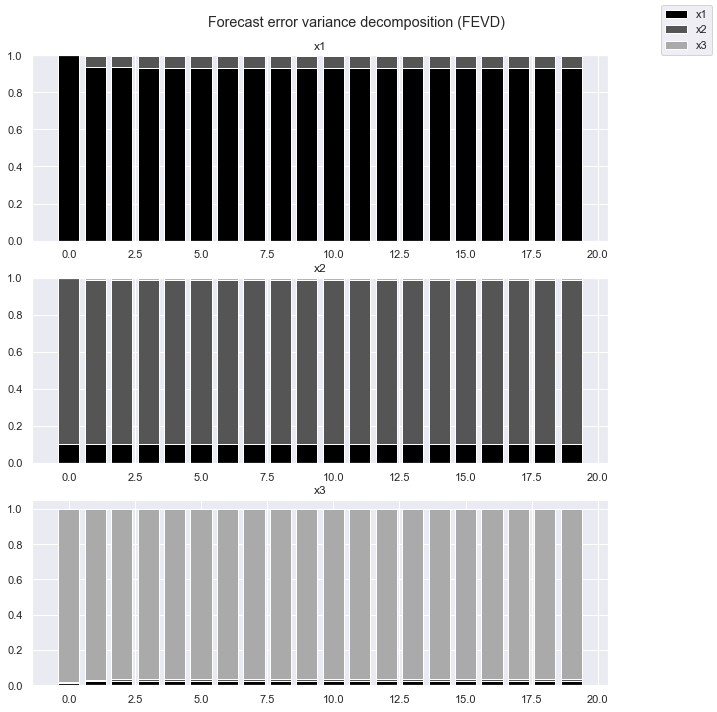

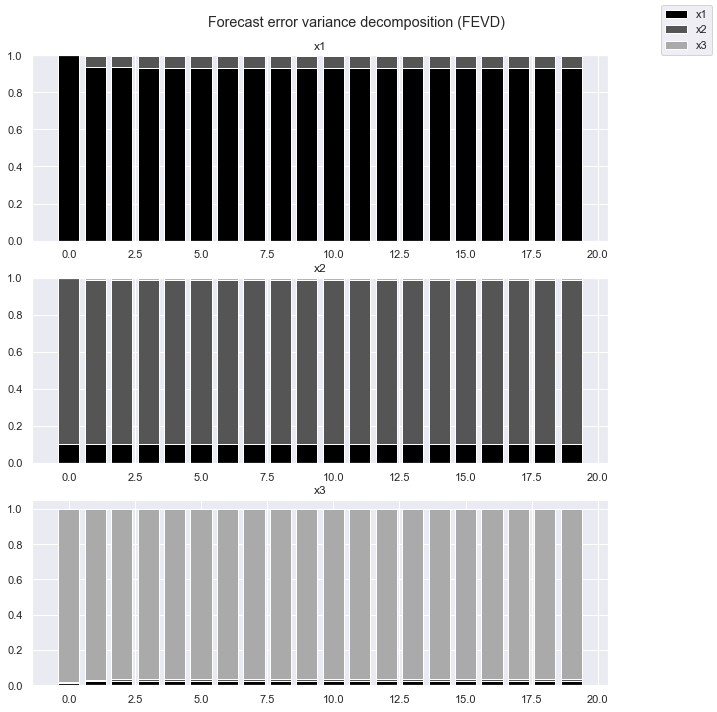

In [39]:
model_fit.fevd(20).plot()

# VAR model residual diagnostics

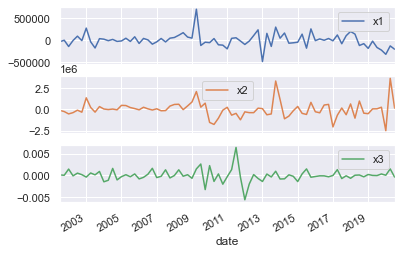

In [40]:
model_fit.resid.plot(subplots = True)
plt.show()

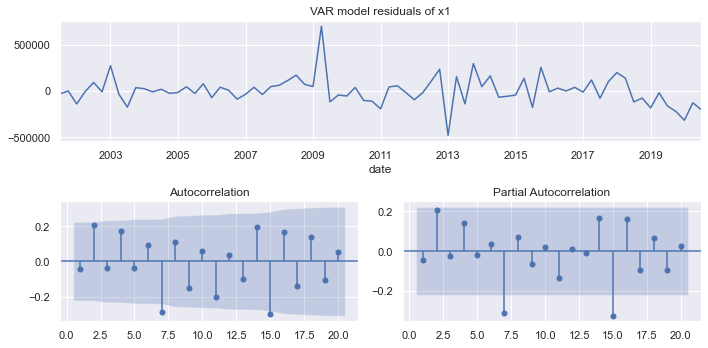

In [41]:
fig = plt.figure(figsize = (10, 5))
model_fit.resid["x1"].plot(ax = fig.add_subplot(211))
plt.title("VAR model residuals of x1")
sm.graphics.tsa.plot_acf(model_fit.resid["x1"], lags = 20, zero = False, ax = fig.add_subplot(223))
sm.graphics.tsa.plot_pacf(model_fit.resid["x1"], lags = 20, zero = False, ax = fig.add_subplot(224))
plt.tight_layout()
plt.show()

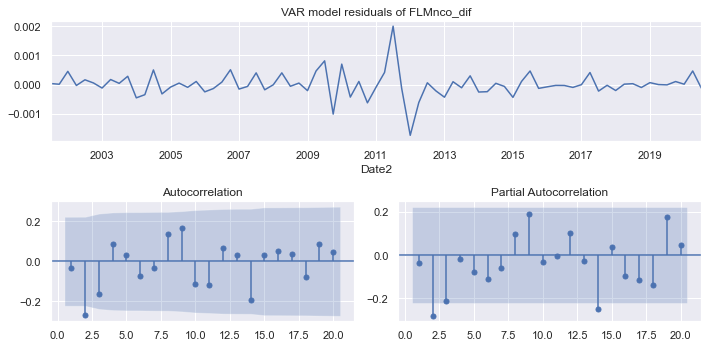

In [411]:
fig = plt.figure(figsize = (10, 5))
model_fit.resid["FLMnco_dif"].plot(ax = fig.add_subplot(211))
plt.title("VAR model residuals of FLMnco_dif")
sm.graphics.tsa.plot_acf(model_fit.resid["FLMnco_dif"], lags = 20, zero = False, ax = fig.add_subplot(223))
sm.graphics.tsa.plot_pacf(model_fit.resid["FLMnco_dif"], lags = 20, zero = False, ax = fig.add_subplot(224))
plt.tight_layout()
plt.show()

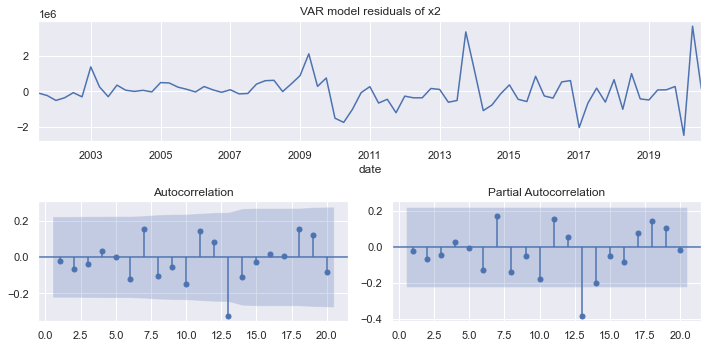

In [42]:
fig = plt.figure(figsize = (10, 5))
model_fit.resid["x2"].plot(ax = fig.add_subplot(211))
plt.title("VAR model residuals of x2")
sm.graphics.tsa.plot_acf(model_fit.resid["x2"], lags = 20, zero = False, ax = fig.add_subplot(223))
sm.graphics.tsa.plot_pacf(model_fit.resid["x2"], lags = 20, zero = False, ax = fig.add_subplot(224))
plt.tight_layout()
plt.show()